*Credit: This activity was prepared by Taher Ahmadi (former Rosie Lab M.Sc.) and adapted by Dr. Lim*

## Pre-Processing Functions

The code below can be used to perform pre-processing on your gesture data from the Week 2 Activity. While you can analyze your raw gesture data, some pre-processing (or "cleaning") of the data can help you obtain better results.

Play around with the different methods of pre-processing and see how it affects your results.

In [ ]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import signal

def date_time_to_elapsed_time(result):
    result['time'] = pd.to_datetime(result['time'])
    position = result.columns.get_loc('time')
    result['time'] =  (result.iloc[1:, position] - result.iat[0, position]).dt.total_seconds()
    result['time'].fillna(0, inplace=True)
    return result

def preprocess(df):
    result = df.copy()

    ## converting date_time column to float time elpsed
    if result['time'].dtype == object:
        result = date_time_to_elapsed_time(result)

    ## Options to try as pre-processing: Use alt+/ to block un-comment / comment
    for feature_name in df.columns:
        ## min-max normalization
        # max_value = result[feature_name].max()
        # min_value = result[feature_name].min()
        # result[feature_name] = (result[feature_name]) / (max_value - min_value)

        ## cropping first and last 20% of the signal
        # cropping_precentage = int(len(result[feature_name])*(2/10))
        # result[feature_name] = result[feature_name][cropping_precentage:-cropping_precentage]

        ## interpolate missing values
        # result[feature_name].interpolate(method='linear', inplace=True)

        ## or simply dropp missing values
        # result[feature_name].dropna(inplace=True)
        pass

    ## re-sampling
    ## if you want to compare signals of different length you can do this step
    # resampled =  signal.resample(result, 100)
    # result = pd.DataFrame(resampled, columns=result.columns)

    ## setting 'time' column as index
    result.set_index('time', inplace=True)

    return result

# Loading the Dataset

Download [gesture_dataset.zip](https://canvas.sfu.ca/files/23295905/download?download_frd=1) from Canvas and extract the data folder into the current directory. The dataset contains the class' gestures as follows:

./turtle

./woof

... etc.
where each person's folder contains their generated .csv files (knock_a.csv, knock_b.csv... wave_a.csv, wave_b.csv..)

*Note: Not all students' gesture data was included in the dataset.*

In [ ]:
## to unzip uploaded data.zip in the colab directory use following command:
!unzip gesture_dataset.zip

Archive:  gesture_dataset.zip
   creating: mystical/
  inflating: mystical/.ds_store      
   creating: __MACOSX/
   creating: __MACOSX/mystical/
  inflating: __MACOSX/mystical/._.ds_store  
  inflating: mystical/wave_d.csv     
  inflating: __MACOSX/mystical/._wave_d.csv  
  inflating: mystical/knock_b.csv    
  inflating: __MACOSX/mystical/._knock_b.csv  
  inflating: mystical/knock_c.csv    
  inflating: __MACOSX/mystical/._knock_c.csv  
  inflating: mystical/knock_a.csv    
  inflating: __MACOSX/mystical/._knock_a.csv  
  inflating: mystical/wave_b.csv     
  inflating: __MACOSX/mystical/._wave_b.csv  
  inflating: mystical/knock_d.csv    
  inflating: __MACOSX/mystical/._knock_d.csv  
  inflating: mystical/wave_c.csv     
  inflating: __MACOSX/mystical/._wave_c.csv  
  inflating: mystical/wave_a.csv     
  inflating: __MACOSX/mystical/._wave_a.csv  
  inflating: __MACOSX/._mystical     
   creating: lamocis/
  inflating: lamocis/.ds_store       
   creating: __MACOSX/lamocis/
  in

In [ ]:
from glob import glob
# Download data.zip from canvas and extract data folder in the current directory
# The file hierarchy is as follows:
#  ./turtle
#  ./woof
# ...
# including recording files of each student named as following:
# ['knock_a.csv', 'knock_b.csv', 'knock_c.csv', 'knock_d.csv',
#  'wave_a.csv', 'wave_b.csv', 'wave_c.csv', 'wave_d.csv']

records = glob("*/")

# The following code reads the data into a pandas dataframe
df = []
for i in range(len(records)):
    knocks = {}
    waves = {}
    print(i, records[i])
    for ch in ['a', 'b', 'c', 'd']:
        try:
            knocks[ch] = pd.read_csv(records[i]+'knock_'+ch+'.csv')
            knocks[ch] = preprocess(knocks[ch])

            waves[ch] = pd.read_csv(records[i]+'wave_'+ch+'.csv')
            waves[ch] = preprocess(waves[ch])
        except:
            print("Failed to read folder ", records[i])
    df.append({'knock':knocks,
               'wave': waves})

0 lebronjames/
1 activity2/
2 chickennugget/
3 _activity2/
4 emotionaldata/
5 mochi/
6 02/
7 angelwings/
8 tomfooler_waveknocks/
9 joe_lee/
10 knock_wave_data/
11 snorlax/
12 pseudonym_1/
13 mydoggoisthecutest/
14 pseudonym1/
15 mustang/
16 turtle/
17 patterson/
18 purplezebra/
19 _djw/
20 a2_jl/
21 ab/
22 woof/
23 cmpt419_tut2/
24 karanvsb/
25 itiswhatitis/
26 pseudonym4/
27 mixedsignals/
28 enj/
29 pip/
30 giselle/
31 capybara/
32 duck/
33 synesthesia/
34 emotional_batch/
35 purple_pingu/
36 week2/
37 alice/
Failed to read folder  alice/
Failed to read folder  alice/
Failed to read folder  alice/
Failed to read folder  alice/
38 jet/
39 ritchie/
40 pseudonym2/
41 a2/
42 samuel/
43 janedoe/
44 emotion_data/
45 arorasamirwa2/
46 zac/
47 cmpt419activity/
48 _emotionaldata/
49 emotional_tunes/
50 mystical/
51 ac/
52 lamocis/
Failed to read folder  lamocis/
53 jane_doe/
54 racoon/
55 johnalvarado/
56 drive_download/
57 sdkfjbkfj/
58 randomstudent/
59 pseudonym3/
60 mzxc/
61 pseudonym/
62 

# Visualizing the Data

Play around with the data (set the user folder by modifying i).

ritchie/


<Figure size 640x480 with 0 Axes>

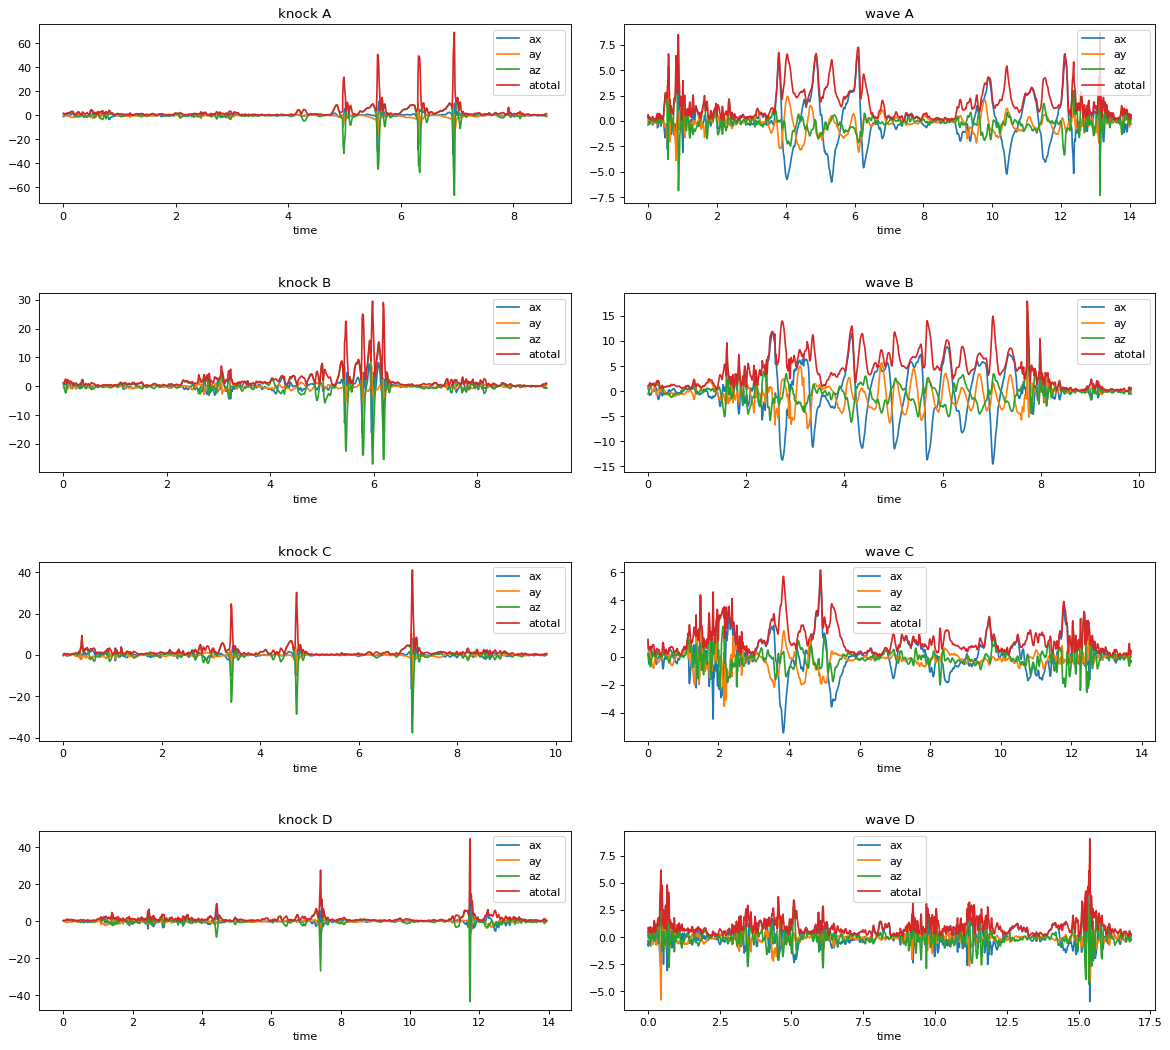

In [12]:
plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 16), dpi= 80,)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

# Plotting 8th data record as an example
i = 39
print(records[i])

# df[i] is the ith person's data
df[i]['knock']['a'].plot(ax=axes[0, 0])
axes[0, 0].set_title('knock A');
df[i]['knock']['b'].plot(ax=axes[1, 0])
axes[1, 0].set_title('knock B');
df[i]['knock']['c'].plot(ax=axes[2, 0])
axes[2, 0].set_title('knock C');
df[i]['knock']['d'].plot(ax=axes[3, 0])
axes[3, 0].set_title('knock D');

df[i]['wave']['a'].plot(ax=axes[0, 1])
axes[0, 1].set_title('wave A');
df[i]['wave']['b'].plot(ax=axes[1, 1])
axes[1, 1].set_title('wave B');
df[i]['wave']['c'].plot(ax=axes[2, 1])
axes[2, 1].set_title('wave C');
df[i]['wave']['d'].plot(ax=axes[3, 1])
axes[3, 1].set_title('wave D');

## Dynamic Time Warping

Now that you've loaded the data into a dataframe, compute the DTW distance between various data samples. Use this code to fill in the confusion matrix as described in the Canvas activity.

  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5299 sha256=37ab499e530474c66c02e087c5c9e838bf9c148c83de55999680558e8215a26d
  Stored in directory: /root/.cache/pip/wheels/71/31/62/5e67f6e31521b8cc1652aa58b1ed0c892514d01eeee85fd49c
Successfully built dtw


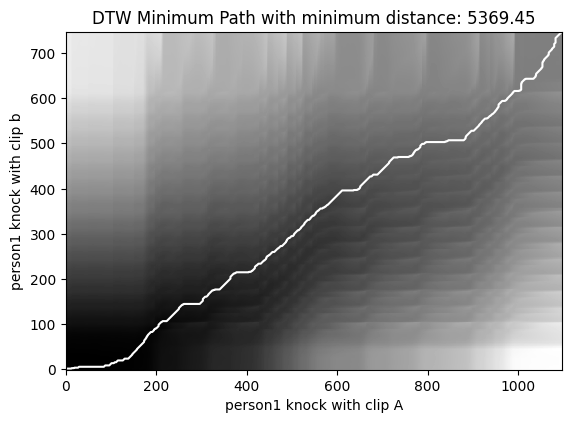

In [14]:
## you may need to run following command (by uncommenting):
#!pip install dtw

from dtw import dtw,accelerated_dtw

#compute DTW distance for person i knocking with audio clip A and B
d1 = df[0]['knock']['a'].interpolate().values
d2 = df[0]['knock']['b'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('person1 knock with clip A')
plt.ylabel('person1 knock with clip b')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

('knock', 'a') ('knock', 'a')


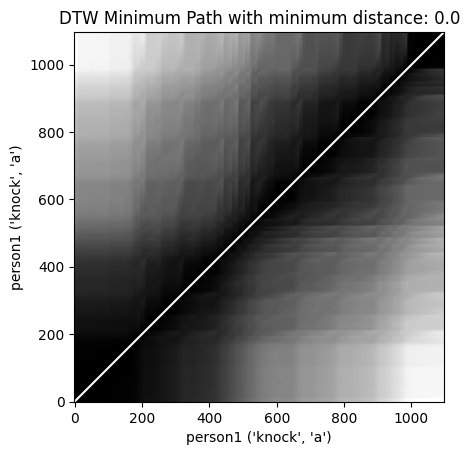

('knock', 'a') ('knock', 'b')


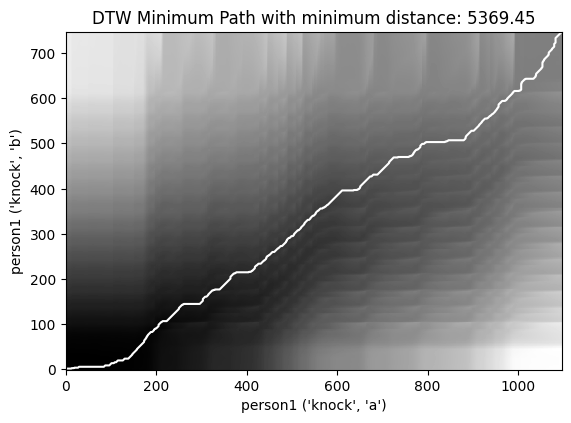

('knock', 'a') ('knock', 'c')


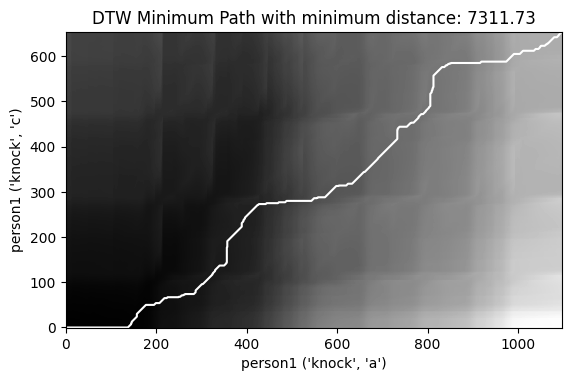

('knock', 'a') ('knock', 'd')


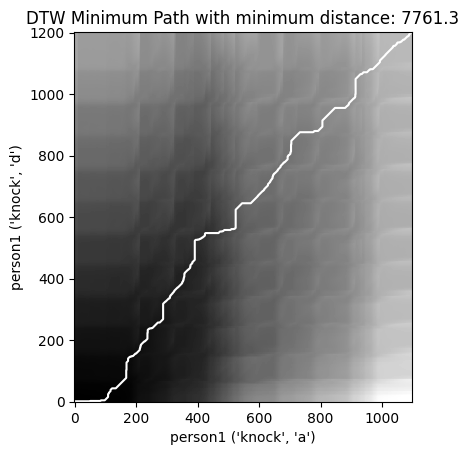

('knock', 'a') ('wave', 'a')


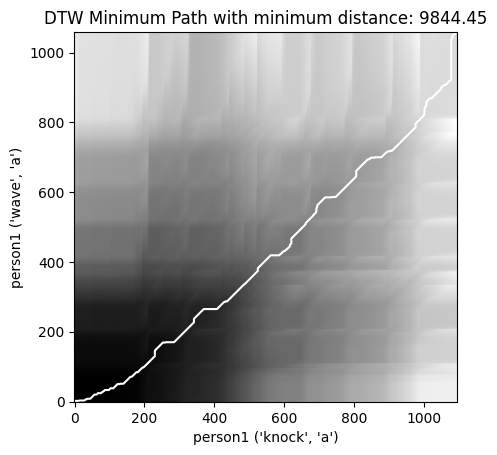

('knock', 'a') ('wave', 'b')


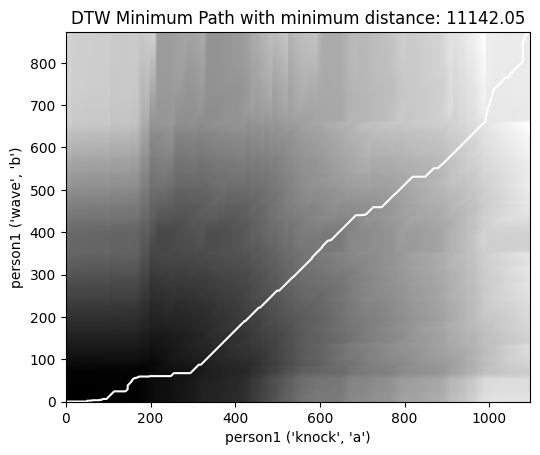

('knock', 'a') ('wave', 'c')


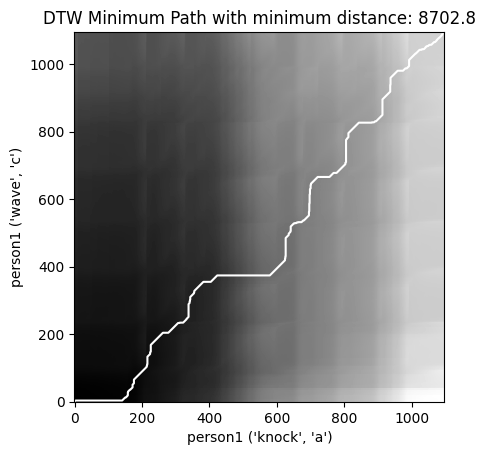

('knock', 'a') ('wave', 'd')


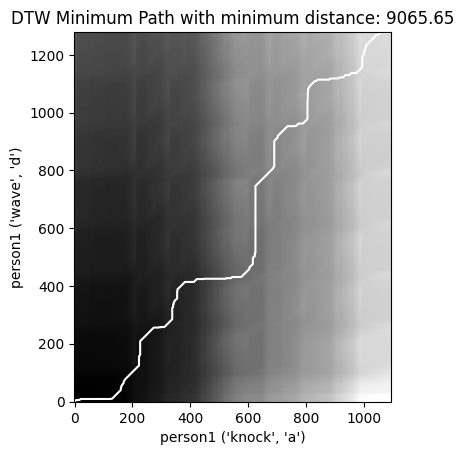

('knock', 'b') ('knock', 'a')


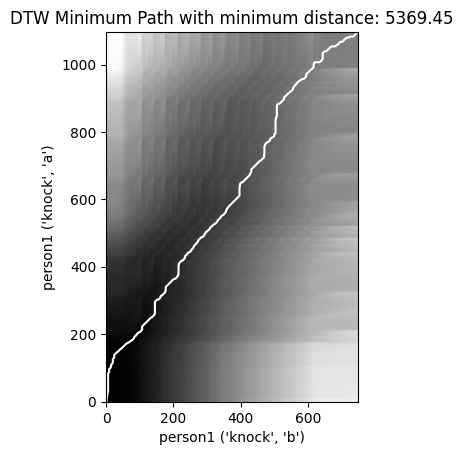

('knock', 'b') ('knock', 'b')


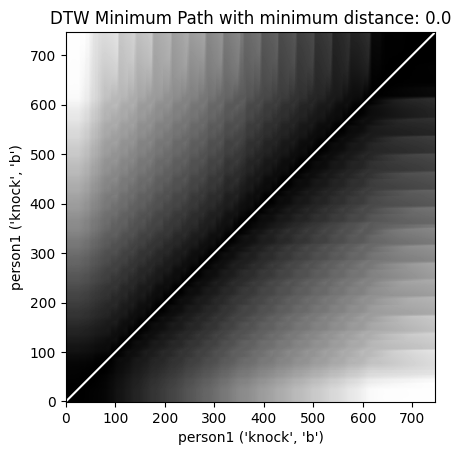

('knock', 'b') ('knock', 'c')


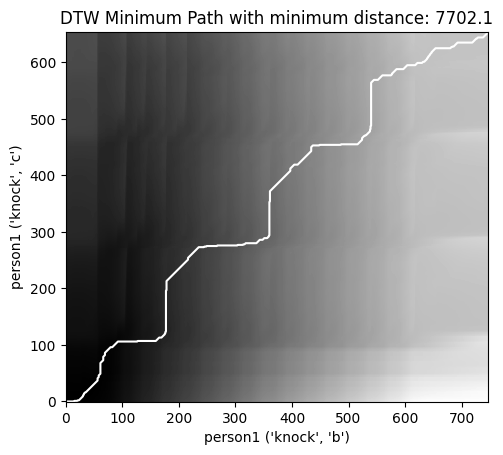

('knock', 'b') ('knock', 'd')


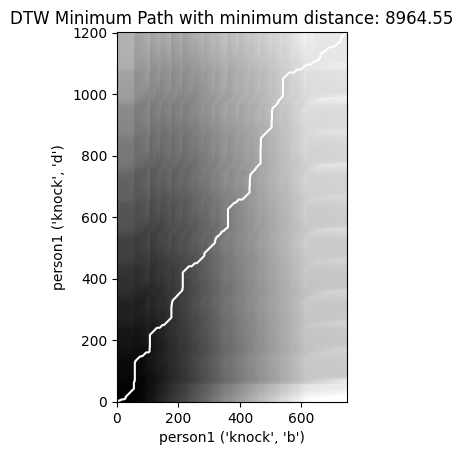

('knock', 'b') ('wave', 'a')


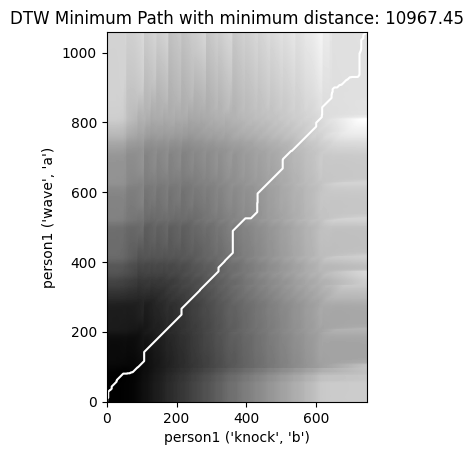

('knock', 'b') ('wave', 'b')


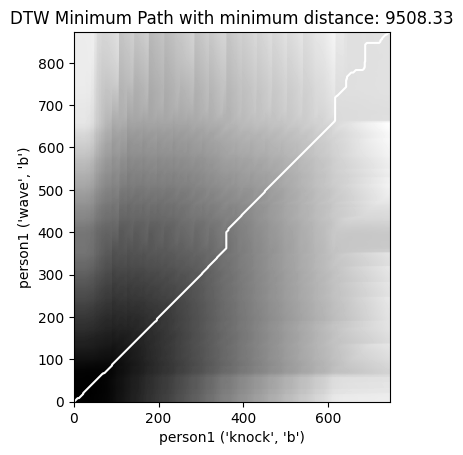

('knock', 'b') ('wave', 'c')


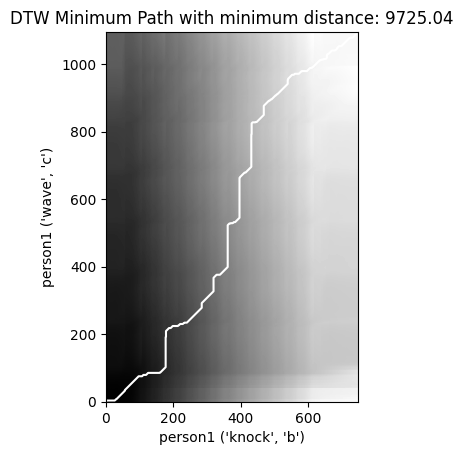

('knock', 'b') ('wave', 'd')


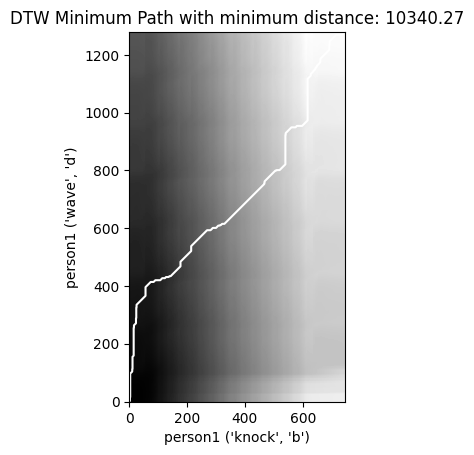

('knock', 'c') ('knock', 'a')


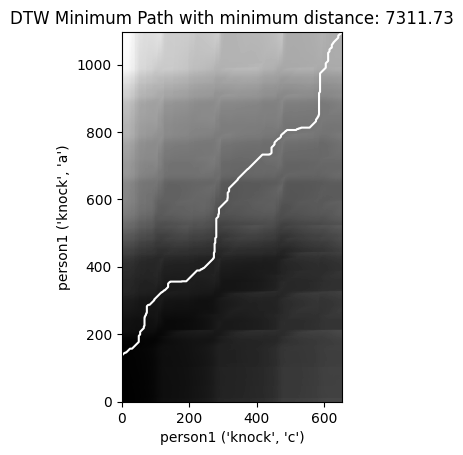

('knock', 'c') ('knock', 'b')


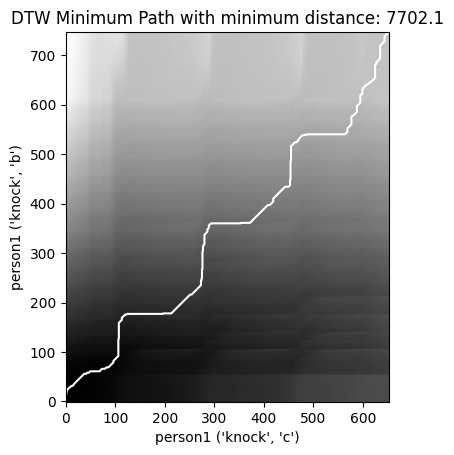

('knock', 'c') ('knock', 'c')


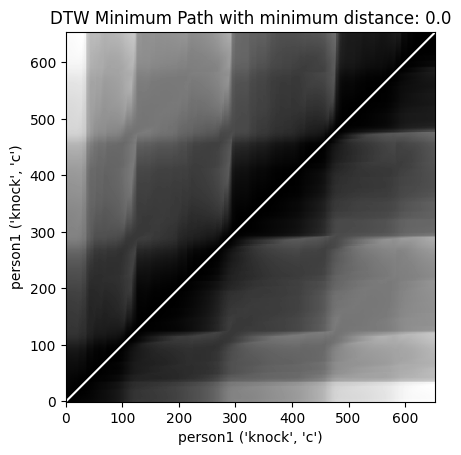

('knock', 'c') ('knock', 'd')


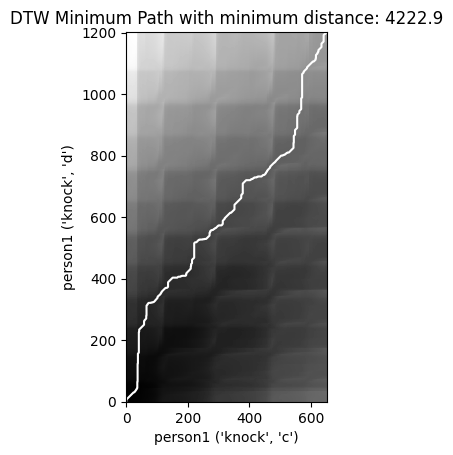

('knock', 'c') ('wave', 'a')


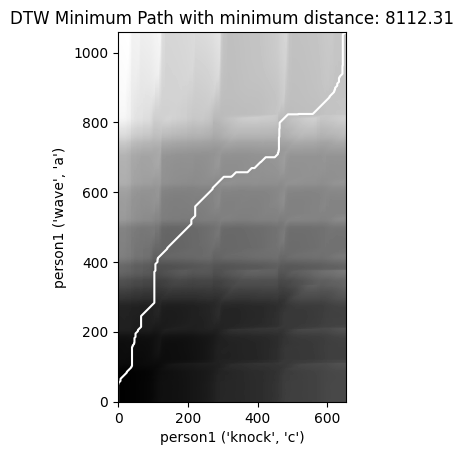

('knock', 'c') ('wave', 'b')


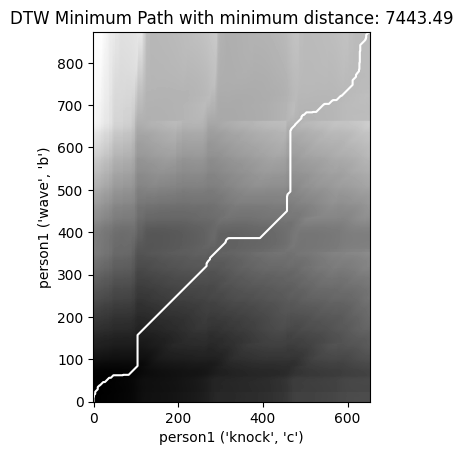

('knock', 'c') ('wave', 'c')


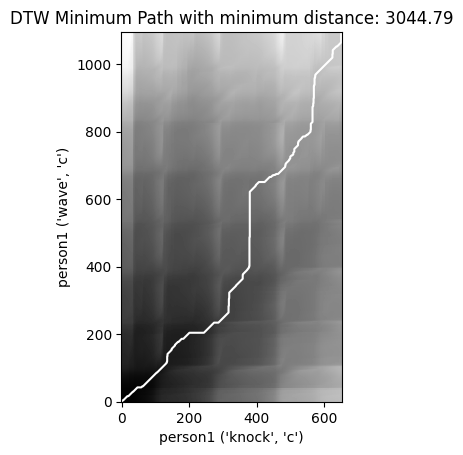

('knock', 'c') ('wave', 'd')


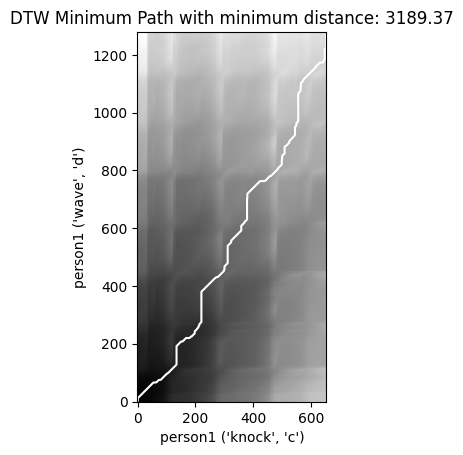

('knock', 'd') ('knock', 'a')


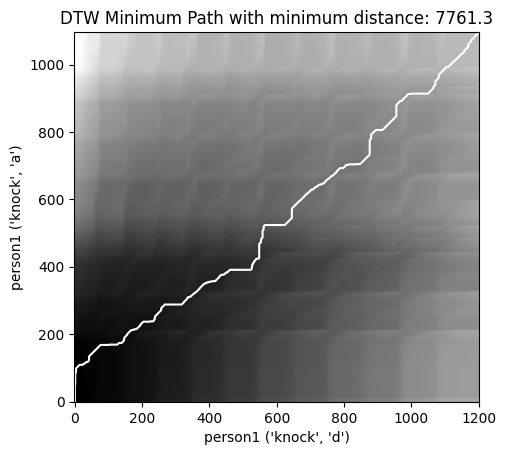

('knock', 'd') ('knock', 'b')


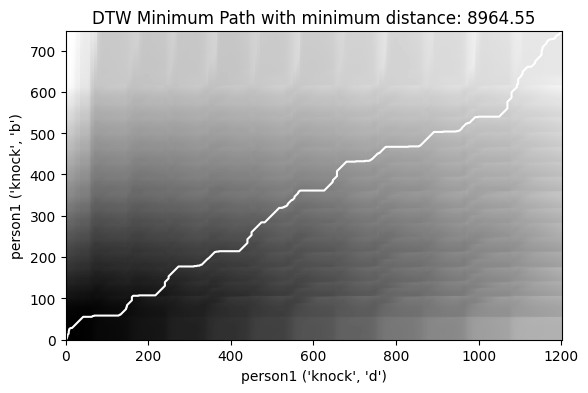

('knock', 'd') ('knock', 'c')


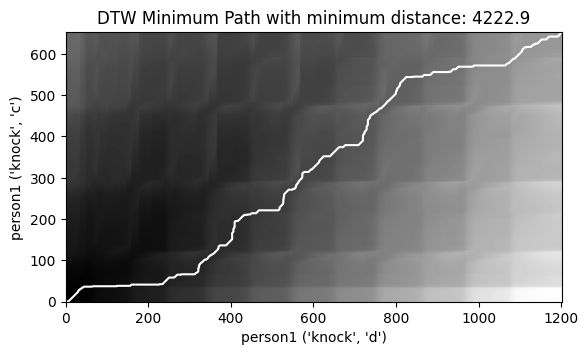

('knock', 'd') ('knock', 'd')


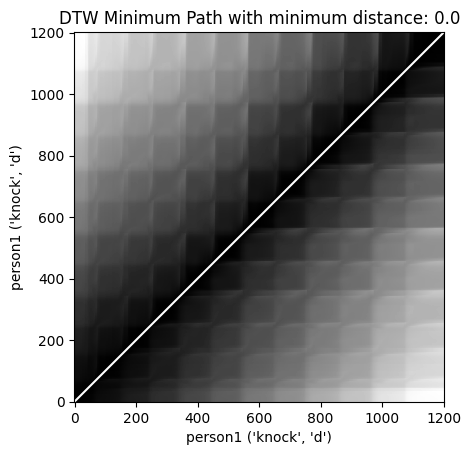

('knock', 'd') ('wave', 'a')


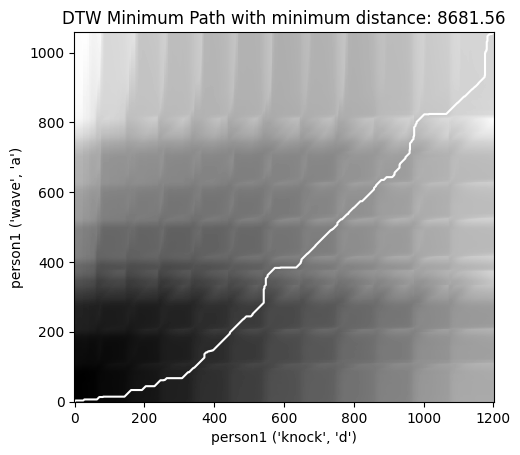

('knock', 'd') ('wave', 'b')


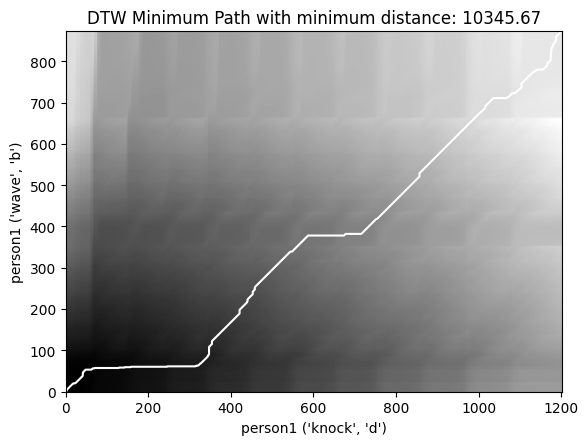

('knock', 'd') ('wave', 'c')


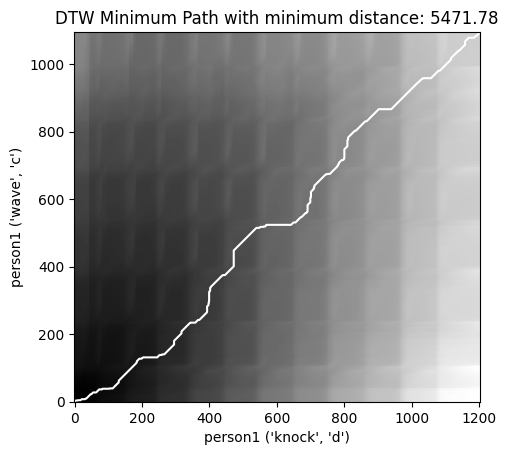

('knock', 'd') ('wave', 'd')


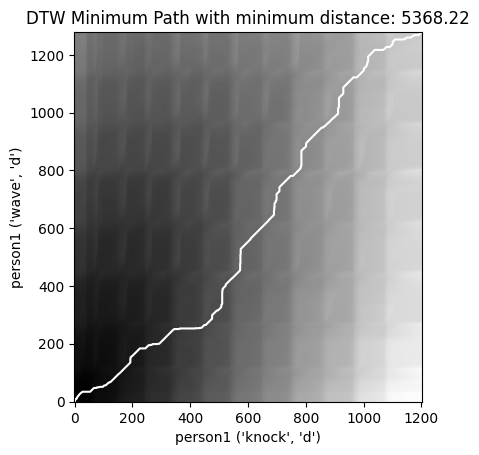

('wave', 'a') ('knock', 'a')


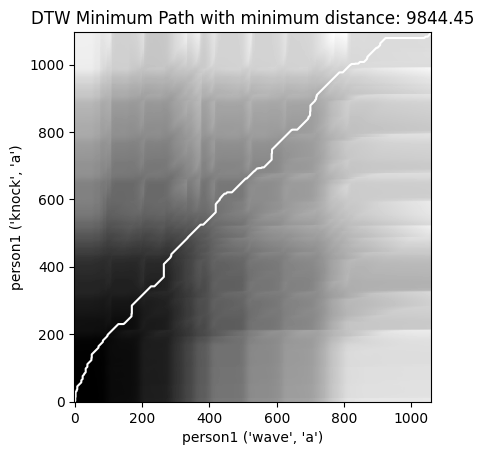

('wave', 'a') ('knock', 'b')


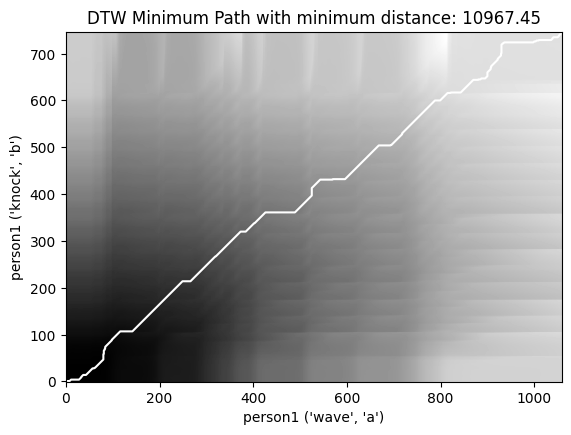

('wave', 'a') ('knock', 'c')


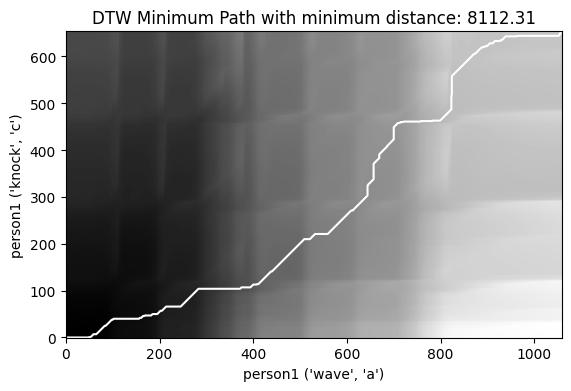

('wave', 'a') ('knock', 'd')


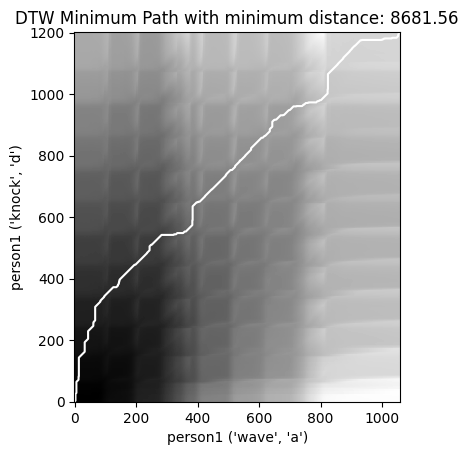

('wave', 'a') ('wave', 'a')


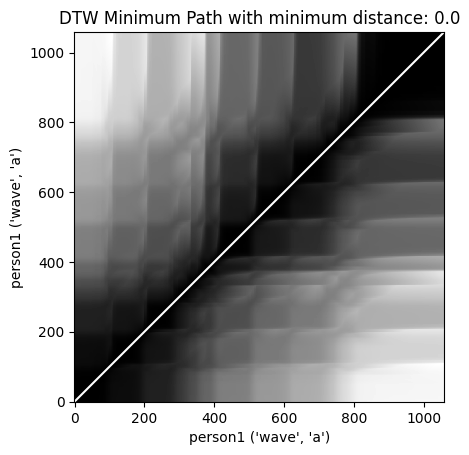

('wave', 'a') ('wave', 'b')


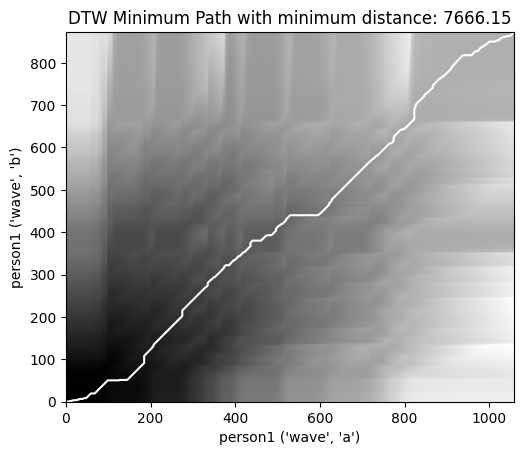

('wave', 'a') ('wave', 'c')


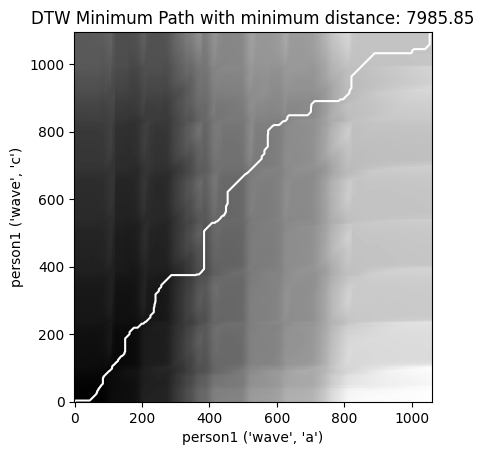

('wave', 'a') ('wave', 'd')


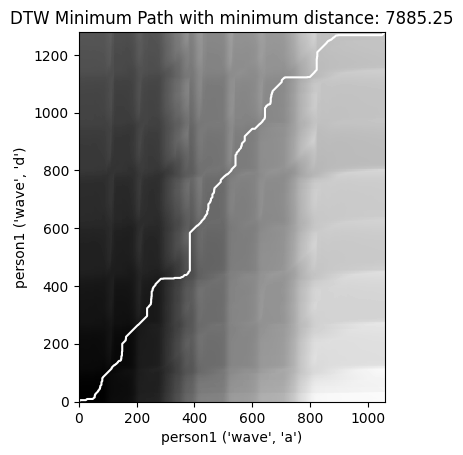

('wave', 'b') ('knock', 'a')


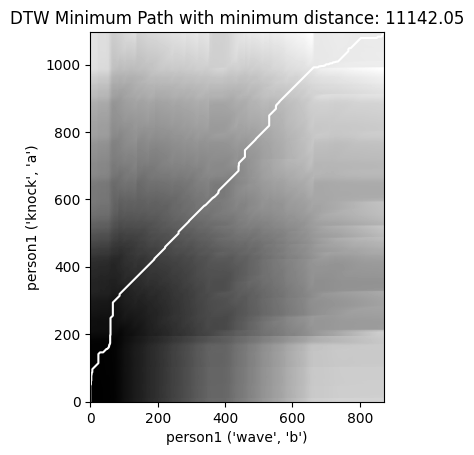

('wave', 'b') ('knock', 'b')


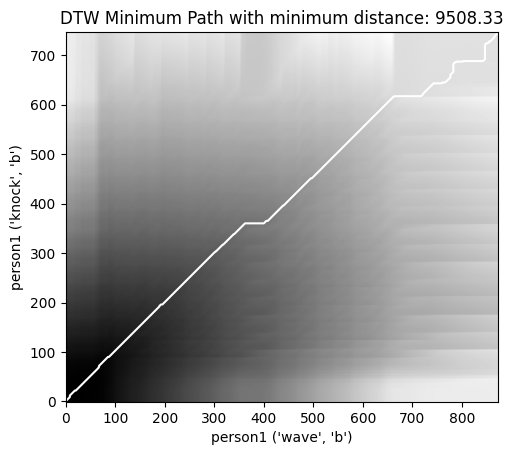

('wave', 'b') ('knock', 'c')


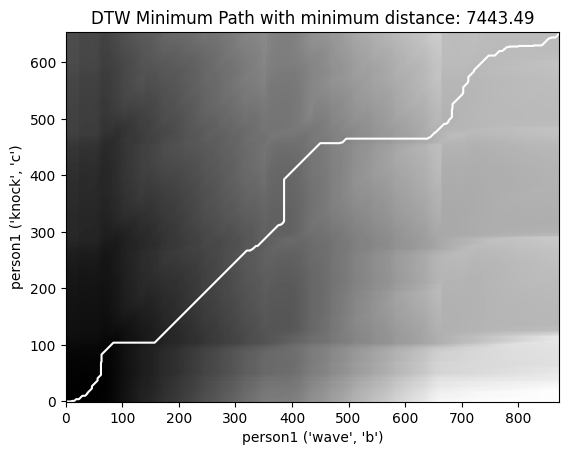

('wave', 'b') ('knock', 'd')


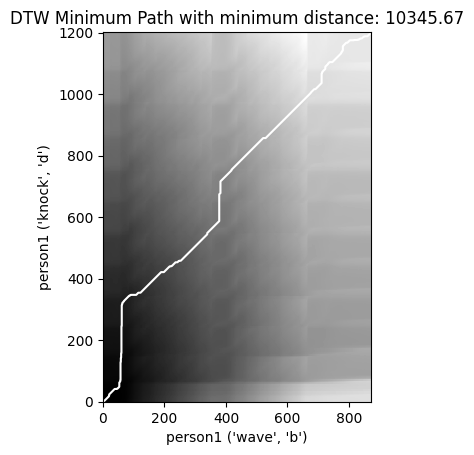

('wave', 'b') ('wave', 'a')


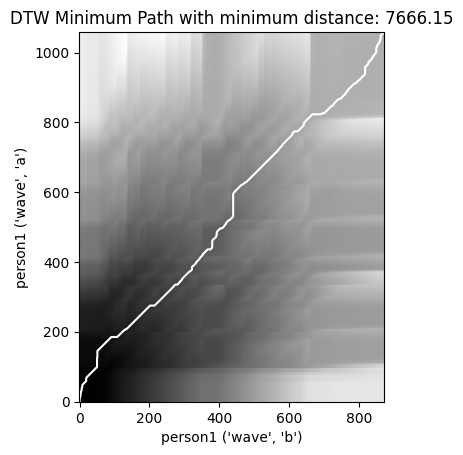

('wave', 'b') ('wave', 'b')


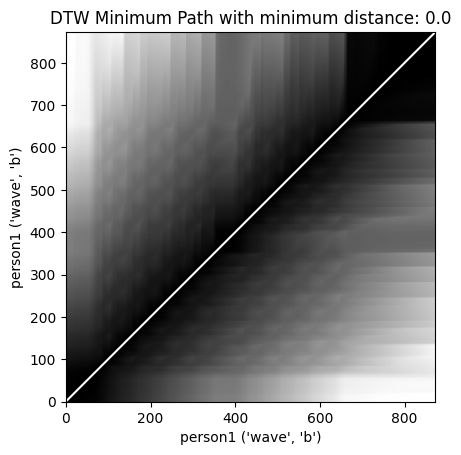

('wave', 'b') ('wave', 'c')


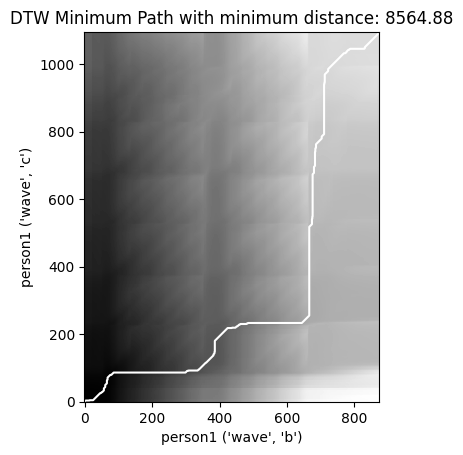

('wave', 'b') ('wave', 'd')


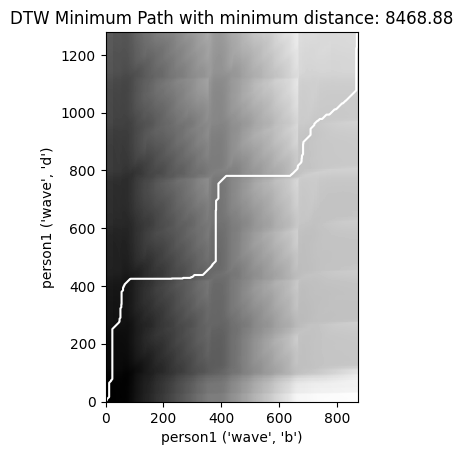

('wave', 'c') ('knock', 'a')


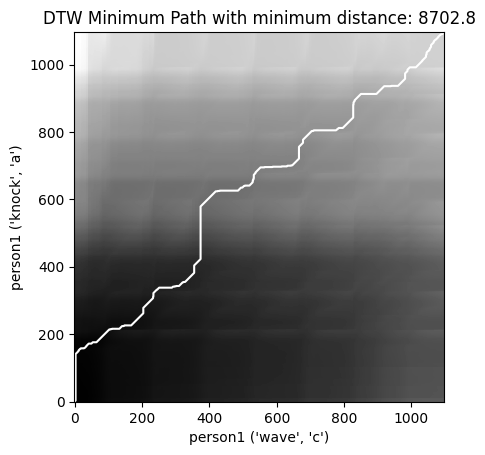

('wave', 'c') ('knock', 'b')


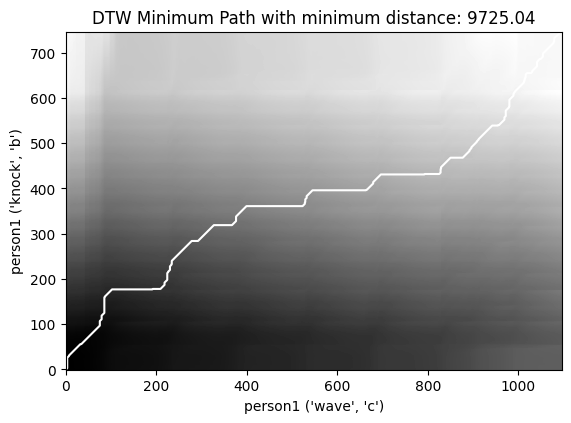

('wave', 'c') ('knock', 'c')


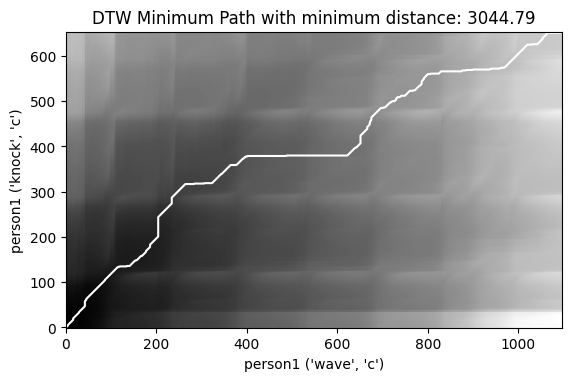

('wave', 'c') ('knock', 'd')


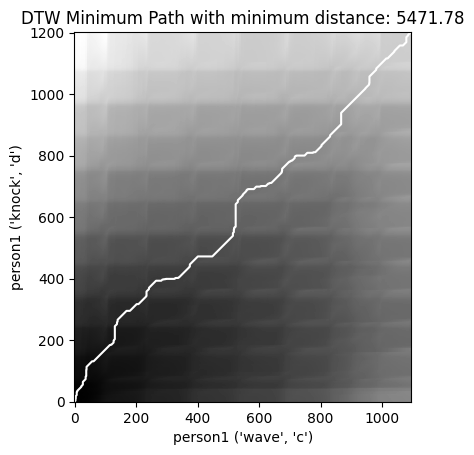

('wave', 'c') ('wave', 'a')


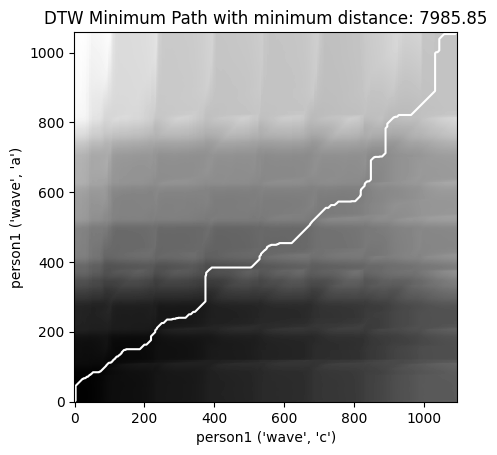

('wave', 'c') ('wave', 'b')


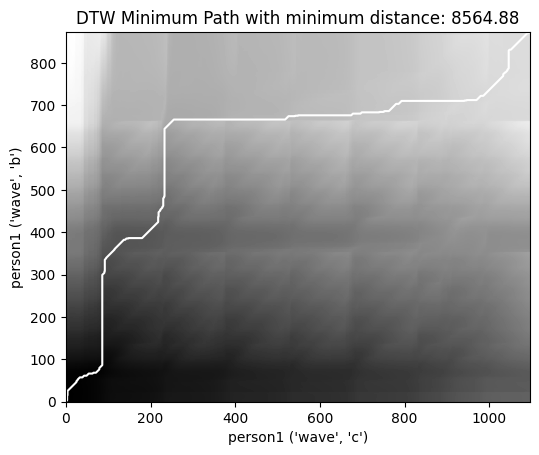

('wave', 'c') ('wave', 'c')


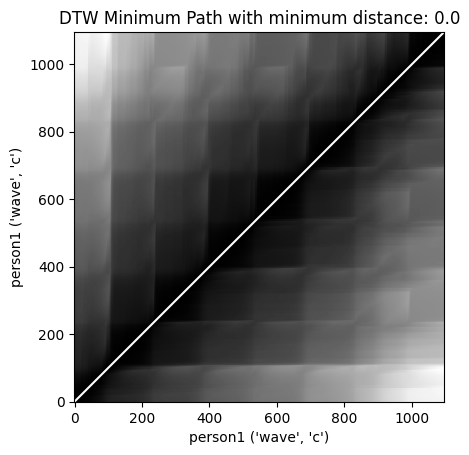

('wave', 'c') ('wave', 'd')


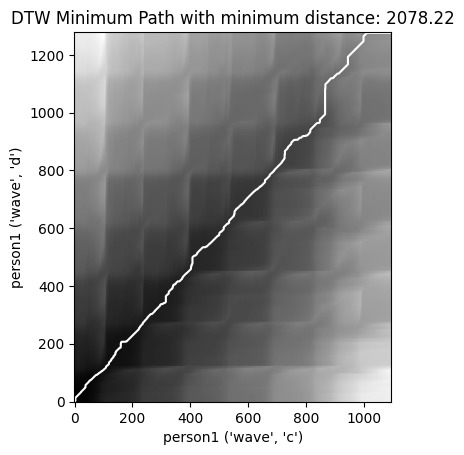

('wave', 'd') ('knock', 'a')


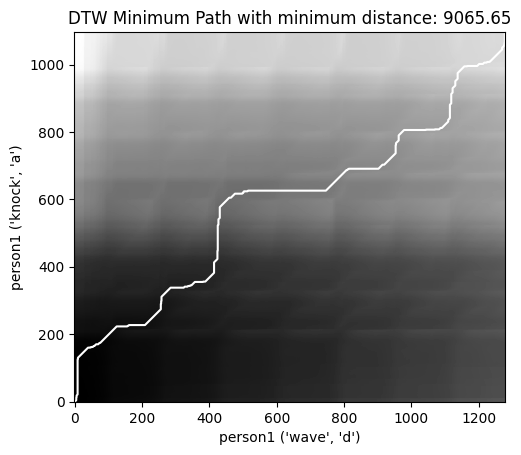

('wave', 'd') ('knock', 'b')


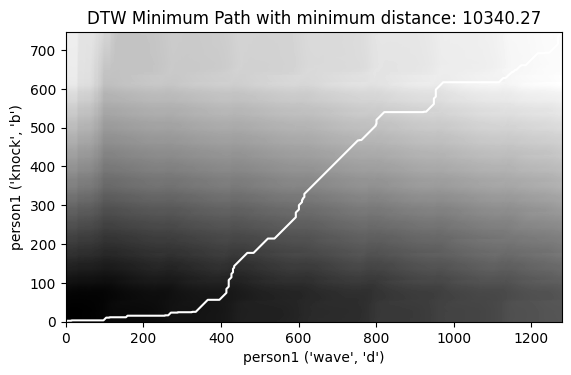

('wave', 'd') ('knock', 'c')


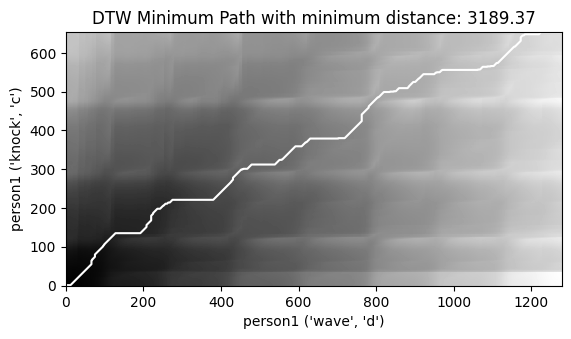

('wave', 'd') ('knock', 'd')


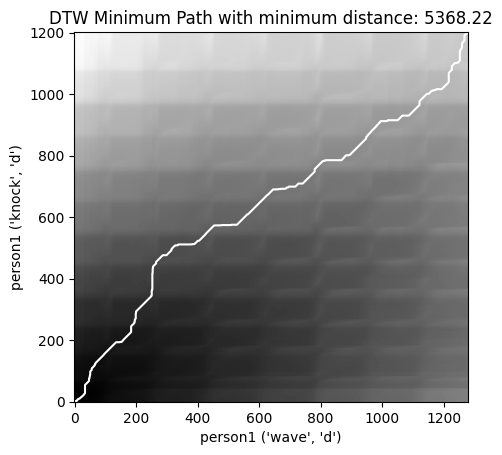

('wave', 'd') ('wave', 'a')


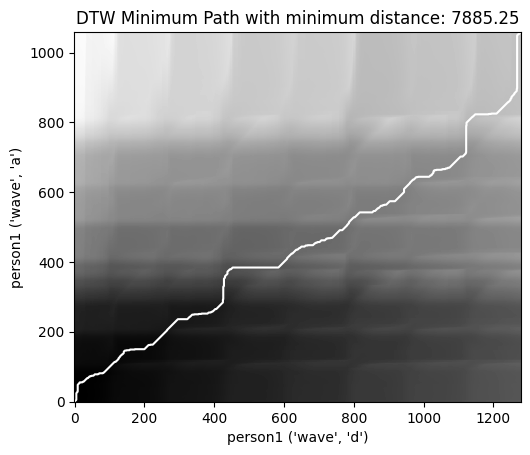

('wave', 'd') ('wave', 'b')


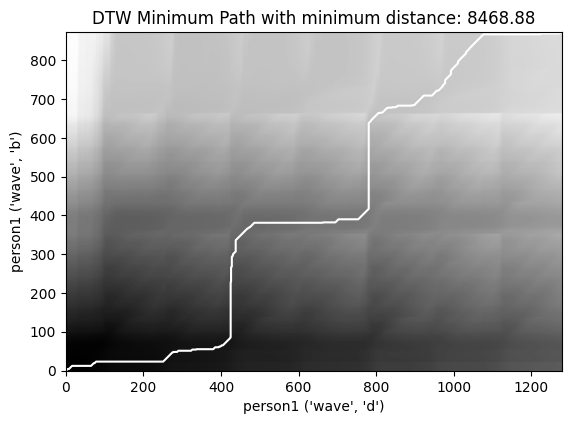

('wave', 'd') ('wave', 'c')


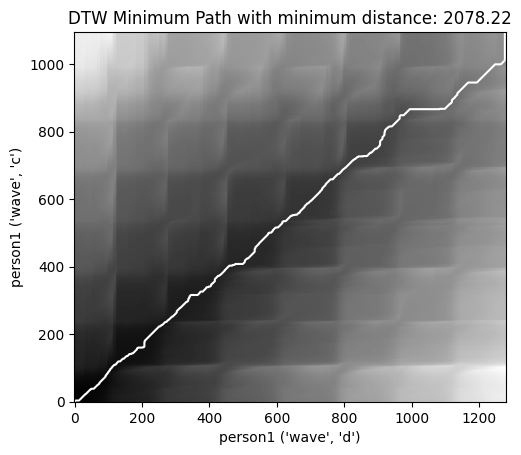

('wave', 'd') ('wave', 'd')


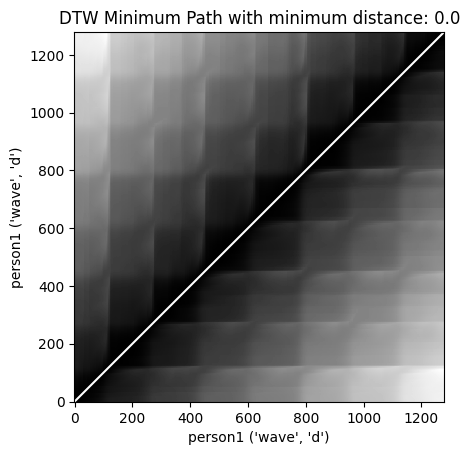

In [15]:
list1 = [(i, j) for i in ['knock', 'wave'] for j in ['a','b','c','d']]
list2 = [(i, j) for i in ['knock', 'wave'] for j in ['a','b','c','d']]

# comparison of DTW for different combinations of acting with different audio clips of one person
# you can compare two different person's data for this part, but you have to be careful with the length of data
for (signal1, signal2) in [(i, j) for i in list1 for j in list2]:
    print(signal1, signal2)
    d1 = df[0][signal1[0]][signal1[1]].interpolate().values
    d2 = df[0][signal2[0]][signal2[1]].interpolate().values
    d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

    plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
    plt.plot(path[0], path[1], 'w')
    plt.xlabel('person1 '+str(signal1))
    plt.ylabel('person1 '+str(signal2))
    plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
    plt.show()
